In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = r"C:\Users\ASUS\color\CLASS"

CATEGORIES = ["Apple___Apple_scab", "Apple___Black_rot"]

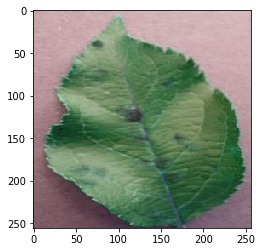

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[[196 163 167]
  [195 162 166]
  [194 161 165]
  ...
  [211 182 185]
  [209 180 183]
  [207 178 181]]

 [[199 166 170]
  [198 165 169]
  [197 164 168]
  ...
  [212 183 186]
  [210 181 184]
  [209 180 183]]

 [[199 166 170]
  [198 165 169]
  [197 164 168]
  ...
  [214 185 188]
  [212 183 186]
  [211 182 185]]

 ...

 [[124  90 100]
  [126  92 102]
  [128  94 104]
  ...
  [137 110 126]
  [137 110 126]
  [137 110 126]]

 [[125  91 101]
  [126  92 102]
  [127  93 103]
  ...
  [133 106 122]
  [134 107 123]
  [134 107 123]]

 [[128  94 104]
  [127  93 103]
  [126  92 102]
  ...
  [132 105 121]
  [133 106 122]
  [134 107 123]]]


In [5]:
print(img_array.shape)

(256, 256, 3)


In [6]:
IMG_SIZE = 224

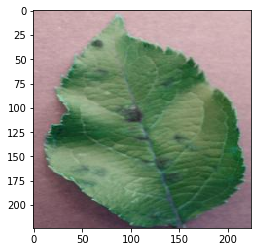

(224, 224, 3)

In [7]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()
new_array.shape

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 621/621 [00:10<00:00, 61.82it/s]


1251


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
0
0
1
1
0


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y).reshape(-1, 1)

In [12]:
X.shape

(1251, 224, 224, 3)

In [13]:
print(y)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


In [14]:
y.shape

(1251, 1)

In [15]:
X=X/255.0
#y=y/255.0

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)
print(y_train.shape, y_test.shape)
print(x_train.shape, x_test.shape)

(875, 1) (376, 1)
(875, 224, 224, 3) (376, 224, 224, 3)


Text(0.5, 1.0, 'Testing Data : [[[0.62745098 0.55294118 0.58823529]\n  [0.67058824 0.59607843 0.63137255]\n  [0.68627451 0.61176471 0.64705882]\n  ...\n  [0.58823529 0.52156863 0.55686275]\n  [0.65490196 0.58823529 0.62352941]\n  [0.63137255 0.56470588 0.6       ]]\n\n [[0.58039216 0.50588235 0.54117647]\n  [0.65098039 0.57647059 0.61176471]\n  [0.67058824 0.59607843 0.63137255]\n  ...\n  [0.65882353 0.59215686 0.62745098]\n  [0.61960784 0.55294118 0.58823529]\n  [0.66666667 0.6        0.63529412]]\n\n [[0.65490196 0.58039216 0.61568627]\n  [0.71372549 0.63921569 0.6745098 ]\n  [0.67843137 0.60392157 0.63921569]\n  ...\n  [0.69803922 0.63137255 0.66666667]\n  [0.64705882 0.58039216 0.61568627]\n  [0.62352941 0.55686275 0.59215686]]\n\n ...\n\n [[0.60784314 0.5254902  0.56470588]\n  [0.60392157 0.52156863 0.55686275]\n  [0.6        0.51764706 0.55294118]\n  ...\n  [0.61960784 0.54117647 0.59215686]\n  [0.60784314 0.52941176 0.58039216]\n  [0.60392157 0.5254902  0.57647059]]\n\n [[0.4627

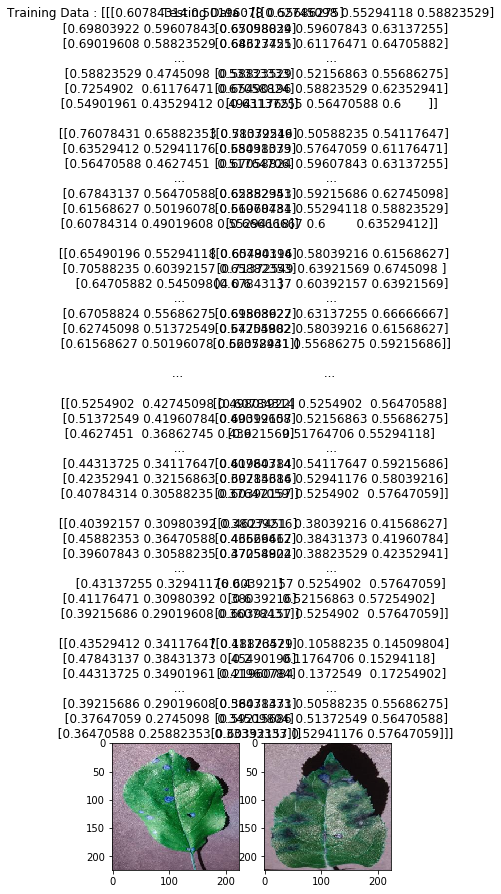

In [17]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:,:])
plt.title("Training Data : {}".format(x_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:,:])
plt.title("Testing Data : {}".format(x_test[0]))

In [18]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

In [19]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((700, 224, 224, 3), (175, 224, 224, 3), (700, 1), (175, 1))

In [22]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [23]:
batch_size = 4
epochs = 3

In [33]:
vgg16_model = keras.applications.vgg16.VGG16()

In [34]:
print(vgg16_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [35]:
type(vgg16_model)

keras.engine.training.Model

In [36]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [32]:
# for layer in model.layers:
#     layer.tainable = False
# #freeze the layers

In [38]:
model.add(Dense(1, activation = 'sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [40]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
plantvillage_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(valid_X, valid_label))

Train on 700 samples, validate on 175 samples
Epoch 1/3
 - 1667s - loss: 7.8419 - acc: 0.5057 - val_loss: 8.4722 - val_acc: 0.4686
Epoch 2/3


In [ ]:
model.save("Plantvillage_model_dropout.h5py")

In [ ]:
test_eval =model.evaluate(x_test, y_test, verbose=1)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])